In [53]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [4]:
y_train.dtype

dtype('uint8')

In [59]:
def display_image(pixels, width=28, height=28, title=None):
    image = np.array(pixels).reshape((height, width))
    plt.figure(figsize=(1, 1))
    plt.imshow(image, cmap='Greens')
    plt.show()

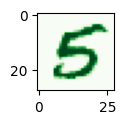

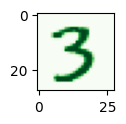

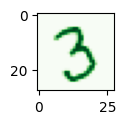

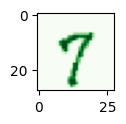

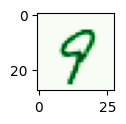

In [60]:
display_image(X_train[20000], width=28, height=28)
display_image(X_train[10000], width=28, height=28)
display_image(X_train[30000], width=28, height=28)
display_image(X_train[43400], width=28, height=28)
display_image(X_train[33300], width=28, height=28)

In [76]:
model = Sequential([
    tf.keras.Input(shape=(784, )),
    Dense(units=128, activation='relu', name='L1'),
    Dense(units=64, activation='relu', name='L2'),
    Dense(units=32, activation='relu', name='L3'),
    Dense(units=10, activation='softmax', name='L4')
])

In [92]:
model.compile(optimizer=Adam(learning_rate=0.01), loss=SparseCategoricalCrossentropy())

In [93]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 128)               100480    
                                                                 
 L2 (Dense)                  (None, 64)                8256      
                                                                 
 L3 (Dense)                  (None, 32)                2080      
                                                                 
 L4 (Dense)                  (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
layer1 = model.get_layer('L1')
layer2 = model.get_layer('L2')
layer3 = model.get_layer('L3')
layer4 = model.get_layer('L4')

In [95]:
layer1_weights = layer1.get_weights()
layer2_weights = layer2.get_weights()
layer3_weights = layer3.get_weights()
layer4_weights = layer4.get_weights()

layer1_weights = [np.array(w) for w in layer1_weights]
layer2_weights = [np.array(w) for w in layer2_weights]
layer3_weights = [np.array(w) for w in layer3_weights]
layer4_weights = [np.array(w) for w in layer4_weights]

print(f'Layer one has weights of shape: {layer1_weights[0].shape}')
print(f'Layer two has weights of shape: {layer2_weights[0].shape}')
print(f'Layer three has weights of shape: {layer3_weights[0].shape}')
print(f'Layer four has weights of shape: {layer4_weights[0].shape}')

Layer one has weights of shape: (784, 128)
Layer two has weights of shape: (128, 64)
Layer three has weights of shape: (64, 32)
Layer four has weights of shape: (32, 10)


In [120]:
model.fit(X_train, y_train, epochs=15, batch_size=62)

Epoch 1/15
968/968 [==============================] - 5s 4ms/step - loss: 0.0431
Epoch 2/15
968/968 [==============================] - 4s 4ms/step - loss: 0.0424
Epoch 3/15
968/968 [==============================] - 4s 4ms/step - loss: 0.0409
Epoch 4/15
968/968 [==============================] - 4s 4ms/step - loss: 0.0390
Epoch 5/15
968/968 [==============================] - 3s 4ms/step - loss: 0.0485
Epoch 6/15
968/968 [==============================] - 4s 4ms/step - loss: 0.0348
Epoch 7/15
968/968 [==============================] - 4s 4ms/step - loss: 0.0345
Epoch 8/15
968/968 [==============================] - 3s 3ms/step - loss: 0.0483
Epoch 9/15
968/968 [==============================] - 4s 4ms/step - loss: 0.0433
Epoch 10/15
968/968 [==============================] - 4s 4ms/step - loss: 0.0460
Epoch 11/15
968/968 [==============================] - 4s 4ms/step - loss: 0.0457
Epoch 12/15
968/968 [==============================] - 4s 4ms/step - loss: 0.0329
Epoch 13/15
968/968 [====

In [121]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [122]:
pred_labels = np.argmax(pred_prob, axis=1)

In [123]:
accuracy = np.mean(np.where(pred_labels==y_test, 1, 0))
print(f'Test accuracy: {accuracy}')

Test accuracy: 0.9758
